<a href="https://colab.research.google.com/github/yamaguchinorimitsu/ajax_app/blob/master/%E6%99%82%E7%B3%BB%E5%88%97%E5%88%86%E6%9E%90%EF%BC%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_air_passengers.csv')

In [2]:
from prophet import Prophet
model = Prophet(seasonality_mode='multiplicative')


In [3]:
model.fit(df)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt1t3slmb/omi2hgyh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt1t3slmb/2vzyqc3x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20400', 'data', 'file=/tmp/tmpt1t3slmb/omi2hgyh.json', 'init=/tmp/tmpt1t3slmb/2vzyqc3x.json', 'output', 'file=/tmp/tmpt1t3slmb/prophet_modeljp1ac95k/prophet_model-20230518231123.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:11:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:11:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [4]:
future = model.make_future_dataframe(periods=36, freq='MS')
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]


,ds,yhat,yhat_lower,yhat_upper
0,1949-01-01,104.158588,91.483997,117.800996
1,1949-02-01,100.636315,87.435718,112.918123
2,1949-03-01,115.099045,101.446139,128.367389
3,1949-04-01,116.677798,103.819700,129.637411
4,1949-05-01,119.542212,105.808659,132.154526
...,...,...,...,...
175,1963-08-01,766.809058,747.363740,785.471274
176,1963-09-01,647.945046,629.594776,665.500801
177,1963-10-01,562.521262,545.336957,578.636975
178,1963-11-01,491.482482,474.871698,506.538945


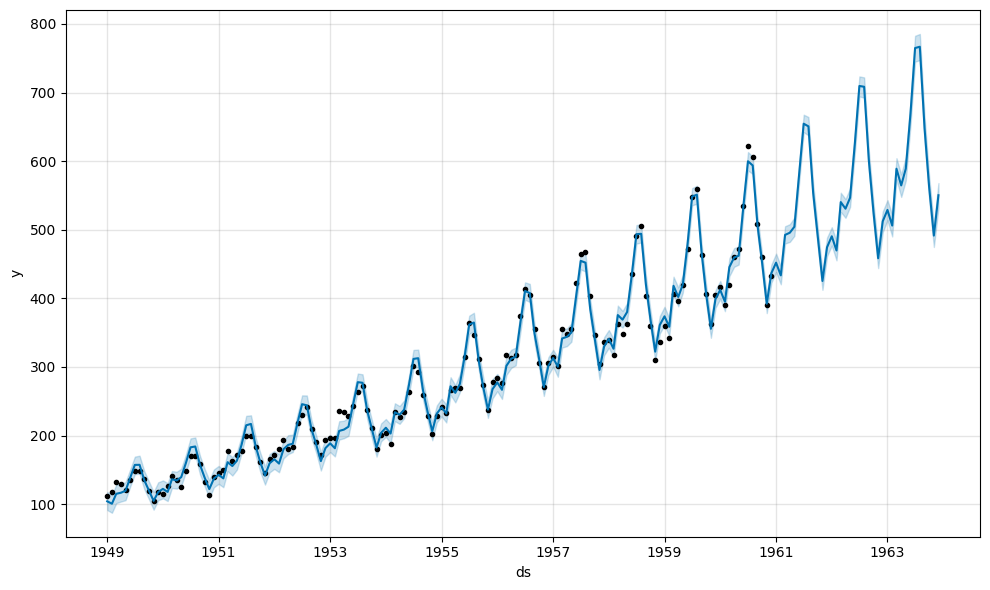

In [5]:
fig_forecast = model.plot(forecast)


In [6]:
cutoffs = pd.to_datetime(['1954-12-01', '1955-12-01', '1956-12-01', '1957-12-01'])
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model, horizon = '1096 days', cutoffs=cutoffs)


  0%|          | 0/4 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpt1t3slmb/wrej8l0y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt1t3slmb/_iowk1y7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32069', 'data', 'file=/tmp/tmpt1t3slmb/wrej8l0y.json', 'init=/tmp/tmpt1t3slmb/_iowk1y7.json', 'output', 'file=/tmp/tmpt1t3slmb/prophet_modeloevtvf69/prophet_model-20230518231132.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:11:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:11:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt1t3slmb/ot2_r9v7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt1t3slmb/0f2jur1f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local

In [7]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv, monthly=True)
df_p.head()


,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,4,519.545765,22.793547,17.315209,0.053292,0.041884,0.051468,0.250000
1,5,565.107344,23.771987,17.785437,0.053256,0.038997,0.051347,0.285714
2,6,581.691578,24.118283,18.921605,0.055010,0.038997,0.054150,0.250000
3,7,631.879513,25.137214,20.639952,0.056280,0.053803,0.056712,0.285714
4,8,569.478111,23.863741,19.150588,0.050571,0.044121,0.051947,0.357143


[(0.0, 5000.0)]

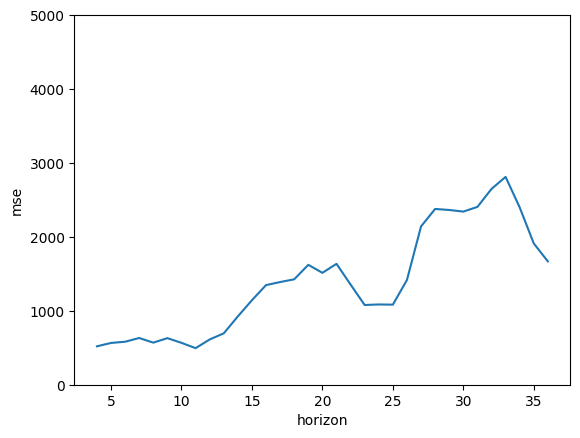

In [8]:
sns.lineplot(x='horizon', y='mse', data=df_p).set(ylim=(0, 5000))


<Axes: xlabel='horizon', ylabel='coverage'>

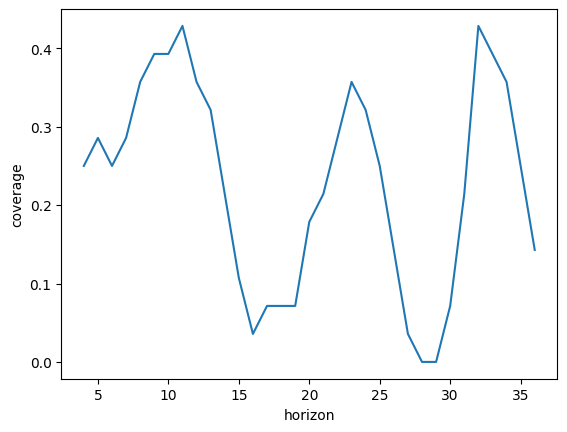

In [9]:
sns.lineplot(x='horizon', y='coverage', data=df_p)


In [10]:
model = Prophet(seasonality_mode='multiplicative',interval_width=0.95)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt1t3slmb/li1a5s16.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt1t3slmb/ylk0mx2b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50159', 'data', 'file=/tmp/tmpt1t3slmb/li1a5s16.json', 'init=/tmp/tmpt1t3slmb/ylk0mx2b.json', 'output', 'file=/tmp/tmpt1t3slmb/prophet_modelqbosq0fg/prophet_model-20230518231856.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:18:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:18:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


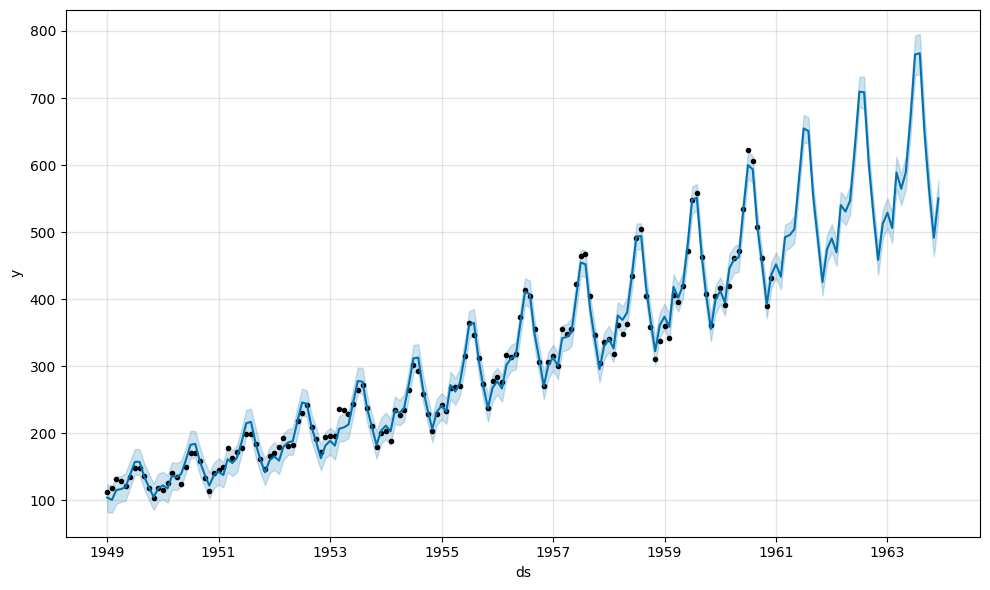

In [11]:
# 予測モデルの学習
model.fit(df)

# 予測期間を指定してDataFrameを生成
future = model.make_future_dataframe(periods=36, freq='MS')

# 予測
forecast = model.predict(future)

# グラフの出力
fig_forecast = model.plot(forecast)


In [12]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]


,ds,yhat,yhat_lower,yhat_upper
0,1949-01-01,104.158588,82.223017,123.706125
1,1949-02-01,100.636315,81.356977,120.541205
2,1949-03-01,115.099045,94.543856,135.453622
3,1949-04-01,116.677798,97.541021,136.232684
4,1949-05-01,119.542212,99.177107,140.351261
...,...,...,...,...
175,1963-08-01,766.809058,735.813100,795.558563
176,1963-09-01,647.945046,620.448966,675.468555
177,1963-10-01,562.521262,535.938938,587.159916
178,1963-11-01,491.482482,464.438855,517.218623


  0%|          | 0/4 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpt1t3slmb/efy0742s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt1t3slmb/mthkql2e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=8696', 'data', 'file=/tmp/tmpt1t3slmb/efy0742s.json', 'init=/tmp/tmpt1t3slmb/mthkql2e.json', 'output', 'file=/tmp/tmpt1t3slmb/prophet_modelcqfu1nd5/prophet_model-20230518232255.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
23:22:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:22:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt1t3slmb/fyze9pu_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt1t3slmb/svd7c1ae.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

<Axes: xlabel='horizon', ylabel='coverage'>

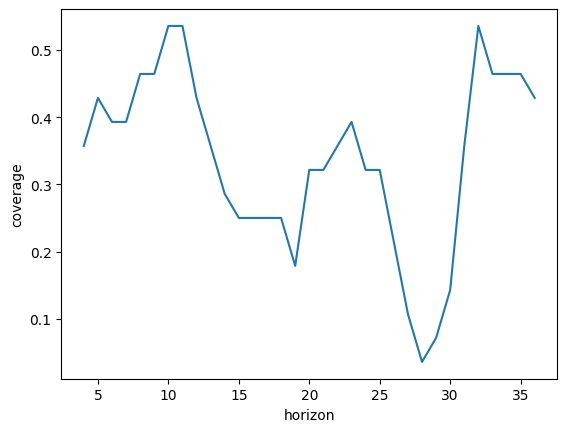

In [13]:
# テストの実施と評価指標の算出
df_cv = cross_validation(model, horizon = '1096 days', cutoffs=cutoffs)
df_p = performance_metrics(df_cv, monthly=True)

# グラフの出力
sns.lineplot(x="horizon", y="coverage", data=df_p)


[(0.0, 0.46)]

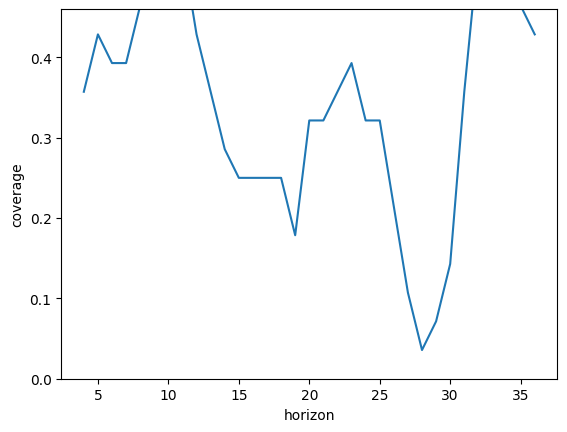

In [14]:
sns.lineplot(x="horizon", y="coverage", data=df_p).set(ylim=(0, 0.46))
